In [24]:
d = [1.0, 2.0]
a = Diagonal(d)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   2.0

In [39]:
x = [1 2 3]
y = x       # name `y` binds to whatever `x` bound to
w = y
z = [2 3 4]
y .= z      # now dispatches the assignment of each element
@show (x, y, z, w);





(x, y, z, w) = ([2 3 4], [2 3 4], [2 3 4], [2 3 4])


In [47]:
y = [1 2]
@show y .-=2

x=5
#or x-=2
x = x-2

y .-= 2 = [-1 0]


3

In [50]:
using StaticArrays
xdynamic = [1, 2]
xstatic = @SVector [1, 2]  # turns it into a highly optimized static vector

f(x) = 2x
@show f(xdynamic)
@show f(xstatic)

# inplace version
function g(x)
    x .= 2x
    return "Success!"
end
@show xdynamic
@show g(xdynamic)
@show xdynamic;

f(xdynamic) = [2, 4]
f(xstatic) = [2, 4]
xdynamic = [1, 2]
g(xdynamic) = "Success!"
xdynamic = [2, 4]


In [51]:
?sort()

```
sort(v; alg::Algorithm=defalg(v), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Variant of [`sort!`](@ref) that returns a sorted copy of `v` leaving `v` itself unmodified.

# Examples

```jldoctest
julia> v = [3, 1, 2];

julia> sort(v)
3-element Array{Int64,1}:
 1
 2
 3

julia> v
3-element Array{Int64,1}:
 3
 1
 2
```

---

```
sort(A; dims::Integer, alg::Algorithm=DEFAULT_UNSTABLE, lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort a multidimensional array `A` along the given dimension. See [`sort!`](@ref) for a description of possible keyword arguments.

To sort slices of an array, refer to [`sortslices`](@ref).

# Examples

```jldoctest
julia> A = [4 3; 1 2]
2×2 Array{Int64,2}:
 4  3
 1  2

julia> sort(A, dims = 1)
2×2 Array{Int64,2}:
 1  2
 4  3

julia> sort(A, dims = 2)
2×2 Array{Int64,2}:
 3  4
 1  2
```


In [66]:
@show a = randn(4)
a.<0
a[a.<0]


a = randn(4) = [0.32167519937692296, 0.5303681421587263, -0.8574825863481941, 0.5760637750751068]


1-element Array{Float64,1}:
 -0.8574825863481941

In [73]:
[log(x) for x in 1:4]

4-element Array{Float64,1}:
 0.0
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

In [75]:
A = [1 2; 3 4]

@show ( det(A), tr(A), eigvals(A), rank(A))


(det(A), tr(A), eigvals(A), rank(A)) = (-2.0, 5, [-0.3722813232690143, 5.372281323269014], 2)


(-2.0, 5, [-0.3722813232690143, 5.372281323269014], 2)

In [77]:
# range like linspace
minval = 0.0
maxval = 1.0
numpoints = 500

a = range(minval,maxval,length=numpoints)

0.0:0.002004008016032064:1.0

In [82]:
t = (1.0, "test")
a,b = t 
println("a = $a and b = $b")

a = 1.0 and b = test


In [87]:
using Parameters

function f(parameters)
    @unpack α,β = parameters #@unpack makes it faster?
    return α + β
end

parameters = (α = 0.1, β = 0.2)
#parameters = (0.1, 0.2) doesn't work, need to assign field
@show f(parameters)

f(parameters) = 0.30000000000000004


0.30000000000000004

In [89]:
# manage default values
using Parameters

paramgen = @with_kw (α = 0.1, β = 0.2)

@show paramgen()
@show paramgen(α = 2.1)
@show paramgen(α = 2.1, β =0.5);

paramgen() = (α = 0.1, β = 0.2)
paramgen(α = 2.1) = (α = 2.1, β = 0.2)
paramgen(α = 2.1, β = 0.5) = (α = 2.1, β = 0.5)


In [94]:
function f(y)
    x=nothing
    if y>0.0
    x=y
    end
    
    if isnothing(x)
        println("x was not set")
    else
        println("x=$x")
    end
    return x
end

@show f(1.0)
@show f(-1.0);

x=1.0
f(1.0) = 1.0
x was not set
f(-1.0) = nothing


In [96]:
# ternanry operator
function f(x)
    x > 0.0 ? sqrt(x) : nothing # ternary pattern "a ? b : c"
end

# can use nothing for error handling
x = [0.1, -1.0, 2.0, -2.0]
f.(x)

4-element Array{Union{Nothing, Float64},1}:
 0.31622776601683794
  nothing
 1.4142135623730951
  nothing

In [97]:
# graceful failure

function f(x)
    @assert x>0.0
    sqrt(x)
end

@show f(1)
@show f(-1);

f(1) = 1.0


LoadError: AssertionError: x > 0.0

In [101]:
# denote optional parameter using nothing

function f(x;z = nothing)
    if isnothing(z)
        println("no z given with $x")
    else
        println("z = $z is assigned with $x")
    end
end

@show f(1.0)
@show f(1.0, z = 3.0);


no z given with 1.0
f(1.0) = nothing
z = 3.0 is assigned with 1.0
f(1.0, z = 3.0) = nothing


In [292]:
# Exercise 1

using LinearAlgebra, Statistics

function lyapunov(A,Σ; tolerance = 1.0E-8, maxiter = 500, S0 = Σ*Σ')
    
    #initialise loop
    normdiff = Inf
    iter = 1
    S_old = S0
    Q = Σ * Σ'
    
    while normdiff > tolerance && iter ≤ maxiter
        
        S_new = A * S_old * A' + Q
        
        #continue looping
        normdiff = norm(S_old - S_new)
        S_old = S_new
        iter = iter +1
    end
    return (S_old,iter)
end

# test function
A = [0.8  -0.2; -0.1  0.7]
Σ = [0.5 0.4; 0.4 0.6]

@show maximum(abs, eigvals(A))

our_solution, iter = lyapunov(A, Σ)
    

maximum(abs, eigvals(A)) = 0.9


([0.6712313771956993 0.6334739853151938; 0.6334739853151939 0.8588744203858814], 72)

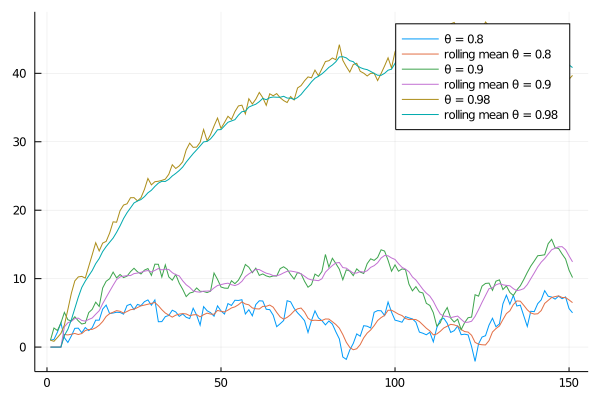

In [293]:
# Exercise 2
using Plots

Θ = [0.8, 0.9, 0.98] #parameters
γ = 1
σ = 1
T = 150 #horizon
p = plot() #naming plot to add
y0 = 1
τ = 5 # moving average - interval

for θ in Θ
    y = zeros(T+1)
    y[1] = y0
    for i ∈ 1:T
        y[i+1] = γ + θ * y[i] + σ * randn()
    end
    plot!(p, y, label = "θ = $θ")
    
    # moving average
    x = zeros(T+1)
    for i ∈ τ:(T+1)
        x[i]= sum(y[(i-τ+1):i])/τ
    end

    plot!(p, x, label = "rolling mean θ = $θ" )
end
p 

(mean_θ1, mean_θ2, mean_θ3) = (mean(y_sim[:, 1]), mean(y_sim[:, 2]), mean(y_sim[:, 3])) = (4.86805798512471, 9.93656283720259, 48.720699416697464)
(var_θ1, var_θ2, var_θ3) = (var(y_sim[:, 1]), var(y_sim[:, 2]), var(y_sim[:, 3])) = (2.679105058715711, 5.2465116907759635, 24.219513851749028)


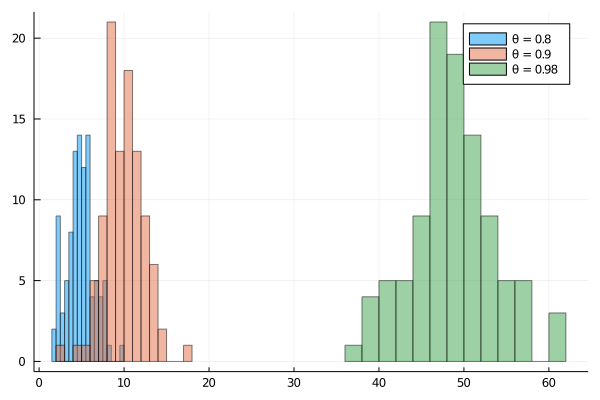

In [295]:
# simulate "nsamp" times

function sim_randomwalk_drift(Θ,γ,σ,T)
    
    y_sim = zeros(nsamp,length(Θ))
    for j in 1:nsamp
        
        y = zeros(T+1,length(Θ))
        y[1,:] = ones(eltype(Θ), length(Θ))
       
        for i in 1:T
            y[i+1,:] = γ .+ Θ .*y[i,:] + σ.*randn(3)
        end
        
        y_sim[j,:] = y[T+1,:]
    end
    return y_sim
end

y_sim = sim_randomwalk_drift(Θ,γ,σ,T)

# find mean and variance of ensemble averages

@show (mean_θ1, mean_θ2, mean_θ3) = (mean(y_sim[:,1]),mean(y_sim[:,2]),mean(y_sim[:,3]))
@show (var_θ1, var_θ2, var_θ3) = (var(y_sim[:,1]),var(y_sim[:,2]),var(y_sim[:,3]))

# plot histogram of T+1 values

h=histogram()
for (i,θ) in enumerate(Θ)
    histogram!(h, y_sim[:,i],α =0.5, label = "θ = $θ",bins =20)
end
h

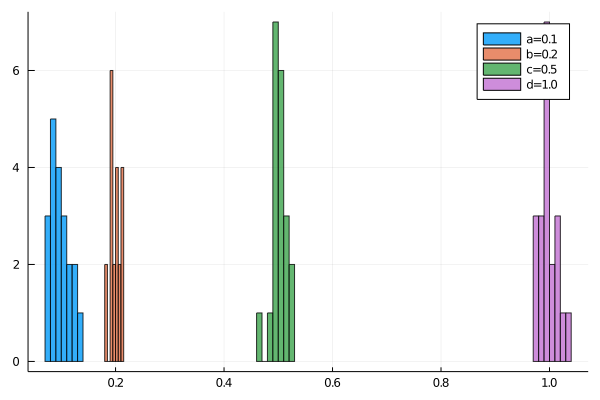

In [273]:
# Exercise 3

# simulate observations

N = 50 # number of observations

x_1, x_2 = (randn(N), randn(N))

a, b, c, d, σ = (0.1, 0.2, 0.5, 1.0, 0.1) #parameters

# simulate data

function simdata(a, b, c, d, σ, N; M = 20)
    y = zeros(N,M)
    for i in 1:N
        y[i,:] = a * x_1[i] + b * x_1[i]^2 + c * x_2[i] + d .+ σ.*randn(M) 
    end
    return y
end

Y = simdata(a, b, c, d, σ, N)

# perform OLS

X = [x_1 x_1.^2 x_2 ones(N)]
β = zeros(M,size(X)[2])

for m in 1:M
    β[m,:] = inv(X'*X)*X'*Y[:,m]
end
β


# plot histograms
Θ = ["a=0.1" "b=0.2" "c=0.5" "d=1.0"]
h = histogram()

for (i,θ) in enumerate(Θ)
    histogram!(h, β[:,i],α = 0.8, label = θ, bins = 10)
end
h


In [206]:
# Exercise 4 - use NL solve

using NLsolve


A = [0.8  -0.2; -0.1  0.7]
Σ = [0.5 0.4; 0.4 0.6]
Q = Σ * Σ'
S0 = Σ * Σ'

f(S) = A * S * A' + Q

f(S0)
sol = fixedpoint(f,S0)
sol



Results of Nonlinear Solver Algorithm
 * Algorithm: Anderson m=4 beta=1 aa_start=1 droptol=0
 * Starting Point: [0.41000000000000003 0.44; 0.44 0.52]
 * Zero: [0.6712314073226504 0.6334739702517158; 0.6334739702517158 0.8588744279176176]
 * Inf-norm of residuals: 0.000000
 * Iterations: 5
 * Convergence: true
   * |x - x'| < 0.0e+00: false
   * |f(x)| < 1.0e-08: true
 * Function Calls (f): 5
 * Jacobian Calls (df/dx): 0

In [210]:
?zip()

```
zip(iters...)
```

Run multiple iterators at the same time, until any of them is exhausted. The value type of the `zip` iterator is a tuple of values of its subiterators.

!!! note
    `zip` orders the calls to its subiterators in such a way that stateful iterators will not advance when another iterator finishes in the current iteration.


# Examples

```jldoctest
julia> a = 1:5
1:5

julia> b = ["e","d","b","c","a"]
5-element Array{String,1}:
 "e"
 "d"
 "b"
 "c"
 "a"

julia> c = zip(a,b)
zip(1:5, ["e", "d", "b", "c", "a"])

julia> length(c)
5

julia> first(c)
(1, "e")
```


In [289]:
x = [5.0, 6.0, 2.1]

q = ones(eltype(x), length(x))

LoadError: MethodError: no method matching one(::Array{Float64,1})
Closest candidates are:
  one(!Matched::Type{Measures.Length{:pct,Float64}}) at /Users/Shane/.julia/packages/Plots/hyS17/src/layouts.jl:31
  one(!Matched::Type{Missing}) at missing.jl:103
  one(!Matched::Type{Measures.Length{:mm,Float64}}) at /Users/Shane/.julia/packages/Plots/hyS17/src/layouts.jl:13
  ...

In [290]:
?eltype()

```
eltype(type)
```

Determine the type of the elements generated by iterating a collection of the given `type`. For dictionary types, this will be a `Pair{KeyType,ValType}`. The definition `eltype(x) = eltype(typeof(x))` is provided for convenience so that instances can be passed instead of types. However the form that accepts a type argument should be defined for new types.

# Examples

```jldoctest
julia> eltype(fill(1f0, (2,2)))
Float32

julia> eltype(fill(0x1, (2,2)))
UInt8
```

---

```
eltype(sc)
```

Returns the (key,value) type (a 2-entry pair, i.e., `Pair{K,V}`) for SortedDict and SortedMultiDict. Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)

---

```
eltype(sc)
```

Returns the (key,value) type (a 2-entry pair, i.e., `Pair{K,V}`) for SortedDict and SortedMultiDict. Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)

---

```
eltype(sc)
```

Returns the key type for SortedSet. This function may also be applied to the type itself. Time: O(1)
